In [836]:

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

# extract Apple and Yahoo Stocks Prices 
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 4, 28)

df = web.DataReader("MSFT", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,99.375191
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,95.719376
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,100.171211
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,100.298965
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,101.026199


In [808]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,433.000000,413.000000,429.730011,421.420013,21123800,421.420013
2020-04-23,438.410004,419.260010,419.260010,426.700012,13952300,426.700012
2020-04-24,427.170013,415.880005,425.000000,424.989990,8670400,424.989990
2020-04-27,429.000000,420.839996,425.000000,421.380005,6277500,421.380005
2020-04-28,421.000000,402.910004,419.989990,403.829987,10101200,403.829987


In [809]:
df.dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989
...,...,...,...,...,...,...
2020-04-22,433.000000,413.000000,429.730011,421.420013,21123800,421.420013
2020-04-23,438.410004,419.260010,419.260010,426.700012,13952300,426.700012
2020-04-24,427.170013,415.880005,425.000000,424.989990,8670400,424.989990


In [810]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [811]:
#code out the Rolling Mean:
close_px = df['Adj Close']
mavg = close_px.rolling(window=300).mean()

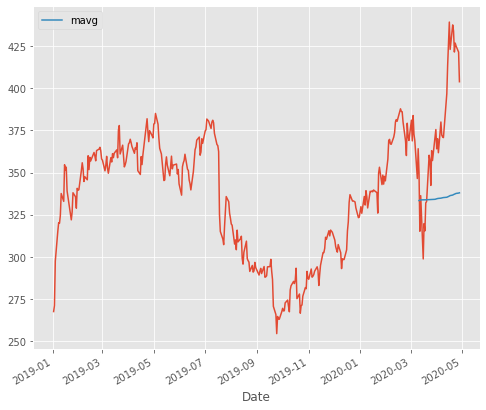

In [812]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='')
mavg.plot(label='mavg')
plt.legend()

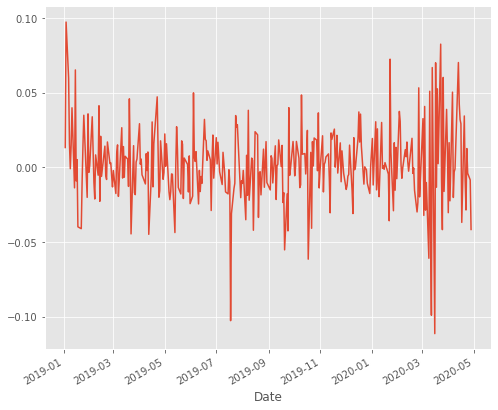

In [813]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return''Plotting the Return Rate' )

In [814]:
#This will returns a table of closing prices among the stocks prices from Yahoo Finance
dfcomp = web.DataReader(['AMZN', 'NFLX', 'AAPL', 'MAR', 'TSLA', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AMZN,NFLX,AAPL,MAR,TSLA,MSFT
Date,,,,,,
2019-01-02,1539.130005,267.660004,155.214005,105.518723,310.119995,99.375191
2019-01-03,1500.280029,271.200012,139.753540,99.902061,300.359985,95.719376
2019-01-04,1575.390015,297.570007,145.719513,105.862404,317.690002,100.171211
2019-01-07,1629.510010,315.339996,145.395203,106.058792,334.959991,100.298965
2019-01-08,1656.579956,320.269989,148.166870,107.777176,335.350006,101.026199


In [815]:
 dfcomp.tail()

Symbols,AMZN,NFLX,AAPL,MAR,TSLA,MSFT
Date,,,,,,
2020-04-22,2363.489990,421.420013,276.100006,80.019997,732.109985,173.520004
2020-04-23,2399.449951,426.700012,275.029999,81.099998,705.630005,171.419998
2020-04-24,2410.219971,424.989990,282.970001,80.709999,725.150024,174.550003
2020-04-27,2376.000000,421.380005,283.170013,85.269997,798.750000,174.050003
2020-04-28,2314.080078,403.829987,278.579987,87.419998,769.119995,169.809998


In [816]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Text(0, 0.5, 'Returns NFLX')

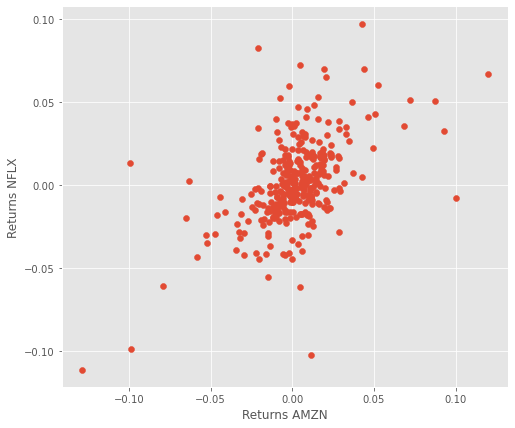

In [817]:
#Plot Apple and GE with ScatterPlot to view their return distributions.
plt.scatter(retscomp.AAPL, retscomp.NFLX)
plt.xlabel('Returns AMZN')
plt.ylabel('Returns NFLX')
#title: Scatter Plot of GE and AAPL We can see here that there are slight positive correlations 
#among GE returns and Apple returns. 
#It seems like that the higher the Apple returns, the higher GE returns as well for most cases.

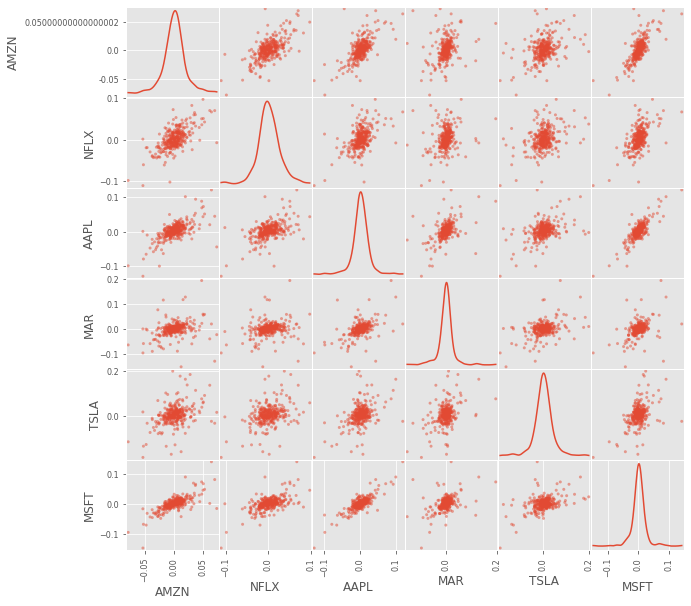

In [818]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

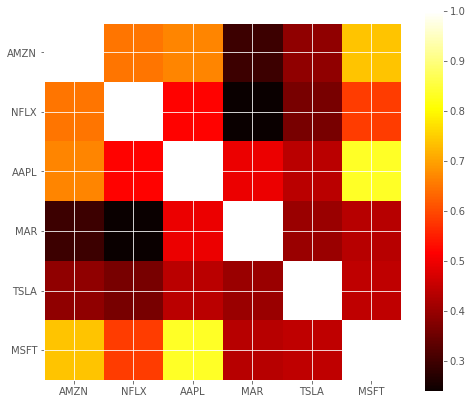

In [819]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
#title: Heatmap of Correlations among competing stocks

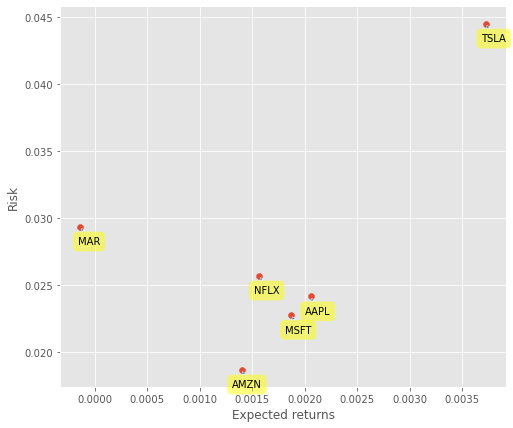

In [820]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = 'Fancy', connectionstyle = 'arc3,rad=0'))

In [821]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [822]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-01-02,267.660004,11679500,4.920426,3.232029
2019-01-03,271.200012,14969600,4.188796,0.370096
2019-01-04,297.570007,19330100,6.472420,5.566199
2019-01-07,315.339996,18620100,4.804336,4.382651
2019-01-08,320.269989,15359200,3.927932,0.090624


In [823]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-04-22,421.420013,21123800,4.745859,-1.933772
2020-04-23,426.700012,13952300,4.487929,1.774556
2020-04-24,424.989990,8670400,2.656535,-0.002355
2020-04-27,421.380005,6277500,1.936495,-0.851764
2020-04-28,403.829987,10101200,4.479607,-3.847712


In [824]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [825]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [826]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [827]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [828]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [829]:
from sklearn.neighbors import NearestNeighbors

In [830]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [831]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('the confidence level for teh regression line is:')
confidencereg 

the confidence level for teh regression line is:


0.8378239885018584

In [832]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
#make it clfreg not just clf

In [833]:
#np.nan.plot()

In [834]:
#forecast_set.plot()

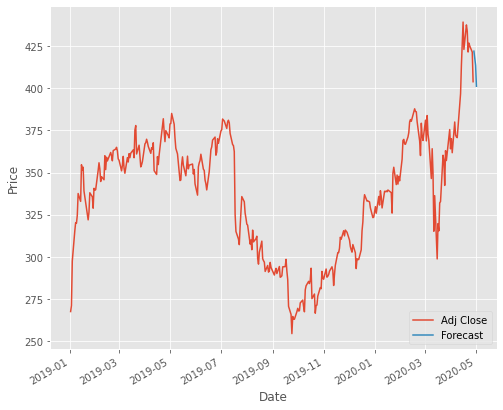

In [835]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
